In [10]:
# Import Libraries for Data handcling
import pandas as pd

# Import Libraries for Numerical Operations
import numpy as np


# Import Libraries for Machine Learning
from sklearn.tree import DecisionTreeClassifier, plot_tree # For building and plotting a classification Tree
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay # To create and plot a confusion matrix
from sklearn.metrics import classification_report # For generating the classification report
from sklearn.metrics import roc_curve, roc_auc_score # For creating and displaying the ROC curve and AUC value
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder 

# Import Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns



In [11]:
df = pd.read_csv('churn.csv')

In [12]:
# Merging Day, Eve, Night Calls into Total Calls
df['Total_Calls'] = df['Day_Calls'] + df['Eve_Calls'] + df['Night_Calls'] 
df = df.drop(['Day_Calls','Eve_Calls','Night_Calls'], axis=1)

# Merging Day, Eve, Night Mins into Total Mins 
df['Total_mins'] = df['Day_Mins'] + df['Eve_Mins'] + df['Night_Mins'] 
df = df.drop(['Day_Mins','Eve_Mins','Night_Mins'], axis=1)

# Merging Day, Eve, Night Mins into Total Charge
df['Total_Charge'] = df['Day_Charge'] + df['Eve_Charge'] + df['Night_Charge'] 
df = df.drop(['Day_Charge','Eve_Charge','Night_Charge'], axis=1)

# Droping 
df = df.drop(['State', 'Area_Code', 'Phone'], axis=1)

In [13]:
col_seq = ['Account_Length', 'Total_Calls', 'Total_mins', 'Total_Charge',
 'Intl_Calls', 'Intl_Charge', 'Intl_Mins', 'CustServ_Calls', 'Vmail_Message',
       'Churn', 'Intl_Plan', 'Vmail_Plan']
df = df[col_seq]

display(df.head())


,Account_Length,Total_Calls,Total_mins,Total_Charge,Intl_Calls,Intl_Charge,Intl_Mins,CustServ_Calls,Vmail_Message,Churn,Intl_Plan,Vmail_Plan
0,128,300,707.2,72.86,3,2.70,10.0,1,25,no,no,yes
1,107,329,611.5,55.54,3,3.70,13.7,1,26,no,no,yes
2,137,328,527.2,59.00,5,3.29,12.2,0,0,no,no,no
3,84,248,558.2,65.02,7,1.78,6.6,2,0,no,yes,no
4,75,356,501.9,49.36,3,2.73,10.1,3,0,no,yes,no


In [14]:
# Making Values in Churn column binary

def binary_convert(x):
    if "yes" in x:
        return 1
    if "no" in x:
        return 0

df['Churn'] = df['Churn'].apply(binary_convert)

# df = df.replace({'Churn': {'no':0, 'yes':1}})

display(df.head())


,Account_Length,Total_Calls,Total_mins,Total_Charge,Intl_Calls,Intl_Charge,Intl_Mins,CustServ_Calls,Vmail_Message,Churn,Intl_Plan,Vmail_Plan
0,128,300,707.2,72.86,3,2.70,10.0,1,25,0,no,yes
1,107,329,611.5,55.54,3,3.70,13.7,1,26,0,no,yes
2,137,328,527.2,59.00,5,3.29,12.2,0,0,0,no,no
3,84,248,558.2,65.02,7,1.78,6.6,2,0,0,yes,no
4,75,356,501.9,49.36,3,2.73,10.1,3,0,0,yes,no


In [15]:
# Creating a copy of dataframe that uses label encoding
df_le = df.copy()

LE = LabelEncoder()

# Label Encoding the categorical feature
df_le['Intl_Plan'] = LE.fit_transform(df['Intl_Plan'])
df_le['Vmail_Plan'] = LE.fit_transform(df['Vmail_Plan'])

# Display the result of encoding
# display(df_le.head())
# display(df_le.shape)

In [16]:
# Creating a copy of dataframe that uses one-hot encoding
df_one = df.copy()

# One-hot Encoding the categorical feature
df_one = pd.get_dummies(df_one, columns= ['Intl_Plan', 'Vmail_Plan'])

# Display the result of encoding
# display(df_one.head())
# display(df_one.shape)

In [17]:
# Create the Features dataframe from one hot encoded dataframe
x_one = df_one.drop(columns = ["Churn"], axis = 1).copy()

# Create the Target Dataframe
y_one = df_one[["Churn"]].copy()

# Create the Features dataframe from label encoded dataframe
x_le = df_le.drop(columns = ["Churn"], axis = 1).copy()

# Create the Target Dataframe
y_le = df_le[["Churn"]].copy()



In [19]:
#Split the Dataset
x_train_one, x_test_one, y_train_one, y_test_one = train_test_split(x_one, y_one, test_size = 0.2, random_state = 47, stratify = y_one )

x_train_le, x_test_le, y_train_le, y_test_le = train_test_split(x_le, y_le, test_size = 0.2, random_state = 47, stratify = y_le )


In [20]:
# Create a model instance
model_one = DecisionTreeClassifier(random_state = 47)
model_le = DecisionTreeClassifier(random_state = 47)

# Fit data to model
model_one = model_one.fit(x_train_one, y_train_one)
model_le = model_le.fit(x_train_le, y_train_le)

y_pred_one = model_one.predict(x_test_one)
y_pred_le = model_le.predict(x_test_le)


In [21]:
model_grid_one = DecisionTreeClassifier(random_state=47)
model_grid_le = DecisionTreeClassifier(random_state=47)

cv = 5

parameters = {  'criterion': ['gini','entropy'], 
                'max_features': ['auto'], 
                'max_depth': np.arange(3, 13, 1).tolist(), 
                'min_samples_leaf': np.arange(1, 4, 1).tolist()}

grid_search_one = GridSearchCV(estimator=model_grid_one,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=cv,
                           n_jobs=-1)

grid_search_le = GridSearchCV(estimator=model_grid_le,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=cv,
                           n_jobs=-1)


In [22]:
model_grid_one = grid_search_one.fit(x_train_one, y_train_one)
model_grid_le = grid_search_le.fit(x_train_le, y_train_le)

In [23]:
y_pred_grid_one = model_grid_one.predict(x_test_one)

y_pred_grid_le = model_grid_le.predict(x_test_le)


In [24]:
display(model_grid_one.best_params_)
display(model_grid_le.best_params_)

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 2}

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2}

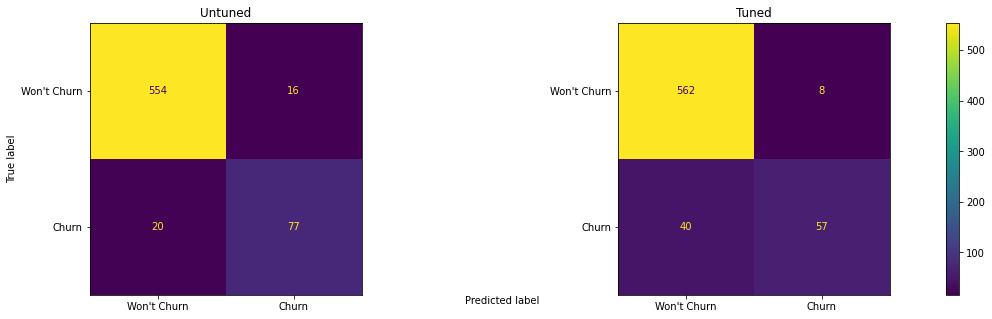

In [25]:
f  , (ax1 , ax2) = plt.subplots(1,2 ,figsize=(20,5))

disp = ConfusionMatrixDisplay(confusion_matrix(y_test_one, y_pred_one), display_labels=["Won't Churn", "Churn"])
disp.plot(ax=ax1)
disp.im_.colorbar.remove()
disp.ax_.set_title('Untuned')
disp.ax_.set_xlabel('')


disp_grid = ConfusionMatrixDisplay(confusion_matrix(y_test_one, y_pred_grid_one), display_labels=["Won't Churn", "Churn"])
disp_grid.plot(ax=ax2)
disp_grid.im_.colorbar.remove()
disp_grid.ax_.set_title('Tuned')
disp_grid.ax_.set_xlabel('')
disp_grid.ax_.set_ylabel('')


f.text(0.45, 0.10, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.45, hspace=0.10)


f.colorbar(disp.im_, ax=[ax1,ax2])
plt.show()


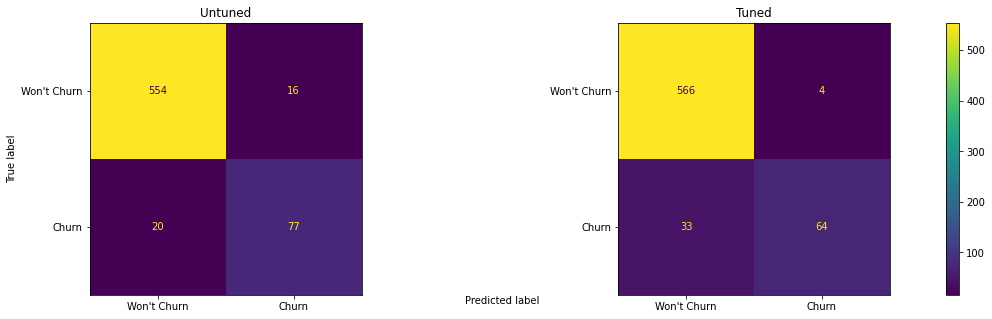

In [26]:
f  , (ax1 , ax2) = plt.subplots(1,2 ,figsize=(20,5))

disp = ConfusionMatrixDisplay(confusion_matrix(y_test_le, y_pred_le), display_labels=["Won't Churn", "Churn"])
disp.plot(ax=ax1)
disp.im_.colorbar.remove()
disp.ax_.set_title('Untuned')
disp.ax_.set_xlabel('')


disp_grid = ConfusionMatrixDisplay(confusion_matrix(y_test_le, y_pred_grid_le), display_labels=["Won't Churn", "Churn"])
disp_grid.plot(ax=ax2)
disp_grid.im_.colorbar.remove()
disp_grid.ax_.set_title('Tuned')
disp_grid.ax_.set_xlabel('')
disp_grid.ax_.set_ylabel('')


f.text(0.45, 0.10, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.45, hspace=0.10)


f.colorbar(disp.im_, ax=[ax1,ax2])
plt.show()




In [27]:
# Generate and diaplay the classification report for untuned model
class_report = classification_report(y_test_one, y_pred_one)
print("Classification Report:")
print(class_report)

# Generate and diaplay the classification report forr tuned model
class_report = classification_report(y_test_le, y_pred_grid_le)
a= 1
print(f"Classification Report:" )
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       570
           1       0.83      0.79      0.81        97

    accuracy                           0.95       667
   macro avg       0.90      0.88      0.89       667
weighted avg       0.95      0.95      0.95       667

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       570
           1       0.94      0.66      0.78        97

    accuracy                           0.94       667
   macro avg       0.94      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667



In [29]:
# Generate and diaplay the classification report for untuned model


class_report = classification_report(y_test_one, y_pred_le)
print("Classification Report:")
print(class_report)

# Generate and diaplay the classification report forr tuned model
class_report = classification_report(y_test_le, y_pred_grid_le)
a= 1
print(f"Classification Report:" )
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       570
           1       0.83      0.79      0.81        97

    accuracy                           0.95       667
   macro avg       0.90      0.88      0.89       667
weighted avg       0.95      0.95      0.95       667

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       570
           1       0.94      0.66      0.78        97

    accuracy                           0.94       667
   macro avg       0.94      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667



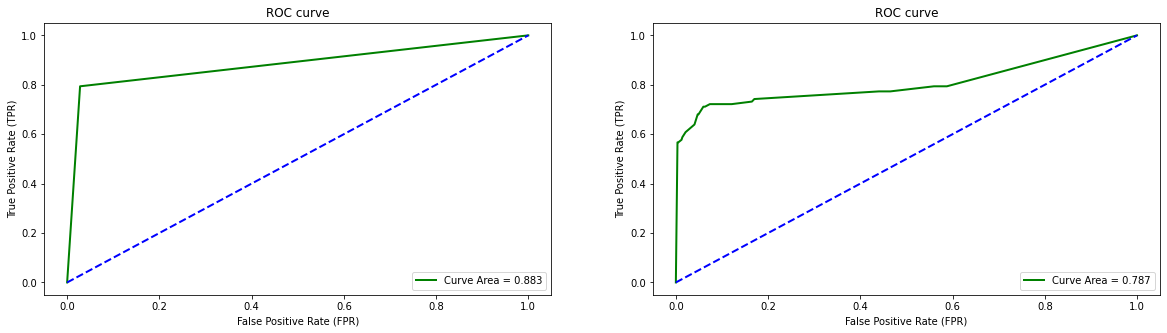

In [31]:
# Get the prediction probabilites

atr = 'one'

y_pred_proba_one = model_one.predict_proba(x_test_one)[:,1]
y_pred_proba_grid_one = model_grid_one.predict_proba(x_test_one)[:,1]

# Generate the ROC values
fpr_one, tpr_one, thr_one = roc_curve(y_test_one, y_pred_proba_one)
fpr_grid_one, tpr_grid_one, thr_grid_one = roc_curve(y_test_one, y_pred_proba_grid_one)

# Evaluate AUC value
auc_one = np.round(roc_auc_score(y_test_one, y_pred_one), 3)
auc_grid_one = np.round(roc_auc_score(y_test_one, y_pred_grid_one), 3)

# Plot the ROC Curve
f  , (ax1 , ax2) = plt.subplots(1,2 ,figsize=(20,5))


ax1.plot(fpr_one, tpr_one, color='green', lw=2, label="Curve Area = " +str(auc_one))
ax1.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
ax1.set_xlabel('False Positive Rate (FPR)')
ax1.set_ylabel('True Positive Rate (TPR)')
ax1.set_title('ROC curve')
ax1.legend(loc="lower right")




# plt.figure(figsize=(8, 8))

ax2.plot(fpr_grid_one, tpr_grid_one, color='green', lw=2, label="Curve Area = " +str(auc_grid_one))
ax2.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
ax2.set_xlabel('False Positive Rate (FPR)')
ax2.set_ylabel('True Positive Rate (TPR)')
ax2.set_title('ROC curve')
ax2.legend(loc="lower right")

plt.show()

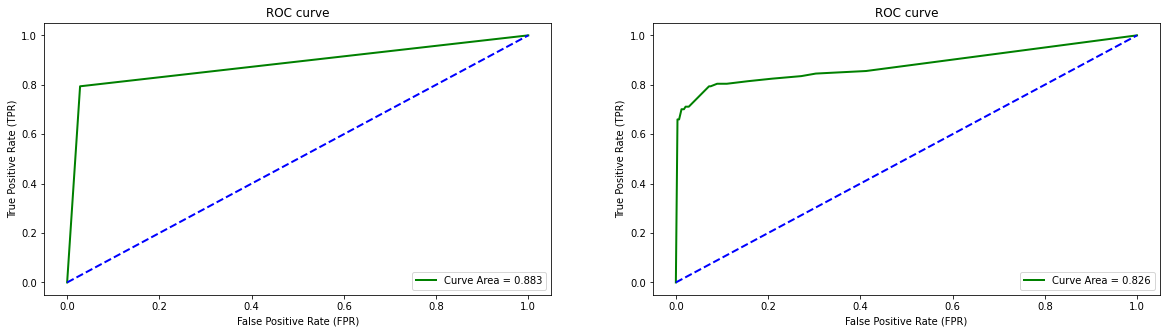

In [32]:
# Get the prediction probabilites

atr = 'le'

y_pred_proba_le = model_le.predict_proba(x_test_le)[:,1]
y_pred_proba_grid_le = model_grid_le.predict_proba(x_test_le)[:,1]

# Generate the ROC values
fpr_le, tpr_le, thr_le = roc_curve(y_test_le, y_pred_proba_le)
fpr_grid_le, tpr_grid_le, thr_grid_le = roc_curve(y_test_le, y_pred_proba_grid_le)

# Evaluate AUC value
auc_le = np.round(roc_auc_score(y_test_le, y_pred_le), 3)
auc_grid_le = np.round(roc_auc_score(y_test_le, y_pred_grid_le), 3)

# Plot the ROC Curve
f  , (ax1 , ax2) = plt.subplots(1,2 ,figsize=(20,5))


ax1.plot(fpr_le, tpr_le, color='green', lw=2, label="Curve Area = " +str(auc_le))
ax1.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
ax1.set_xlabel('False Positive Rate (FPR)')
ax1.set_ylabel('True Positive Rate (TPR)')
ax1.set_title('ROC curve')
ax1.legend(loc="lower right")




# plt.figure(figsize=(8, 8))

ax2.plot(fpr_grid_le, tpr_grid_le, color='green', lw=2, label="Curve Area = " +str(auc_grid_le))
ax2.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
ax2.set_xlabel('False Positive Rate (FPR)')
ax2.set_ylabel('True Positive Rate (TPR)')
ax2.set_title('ROC curve')
ax2.legend(loc="lower right")

plt.show()